In [1]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import math

from intersection_functions import *

In [5]:
def get_y_intersection_points_t(first_y_intersection_point, spiral_radius_velocity, 
                              spiral_angle_velocity, angle_diff,
                              y_lim):
    max_points_length = np.sqrt(y_lim[0]**2 + y_lim[1] ** 2)
    
    y_intersection_points_t = []

    first_intsc_point_t = abs(first_y_intersection_point)/spiral_radius_velocity

    
    additional_t = np.pi/ abs(spiral_angle_velocity)

    
    y_intersection_points_t.append(first_intsc_point_t)
    
    is_break = False
    
    while not is_break:
        first_intsc_point_t += additional_t

        if first_intsc_point_t * spiral_radius_velocity > max_points_length:
            is_break = True
        y_intersection_points_t.append(first_intsc_point_t)

    return y_intersection_points_t


In [416]:
def calc_spiral_line_intersection_points(a, b, t, 
                               spiral_radius_velocity, 
                               init_spiral_angle, spiral_angle_velocity, 
                               min_distance, t_index, accuracy=5):
    
        min_dist_accuracy = f'{min_distance:.{accuracy}f}'
        
        input_spiral_vector = t * spiral_radius_velocity
        
        init_spiral_x = input_spiral_vector * np.cos(init_spiral_angle + t* spiral_angle_velocity)
        init_spiral_y = input_spiral_vector * np.sin(init_spiral_angle + t * spiral_angle_velocity)
        
        # print('t: ', t, 'init x: ', init_spiral_x, 'init y: ', init_spiral_y)
        
        directional_coeff =get_delta_coeff(a, b, init_spiral_y)

        original_const_vector_length = np.copy(input_spiral_vector)


        const_vector_angle = init_spiral_angle + (original_const_vector_length / spiral_radius_velocity) * spiral_angle_velocity

        n = 0
        while True:
      
            last_spiral_vector = np.copy(float(f'{input_spiral_vector:.{accuracy}f}'))
            
            
            ' and delta_angle <= np.pi/2'
            # print(delta_angle*180/np.pi)
            if input_spiral_vector != 0:
                
                delta_angle = np.arctan(min_distance/input_spiral_vector) * directional_coeff
                
                length_to_add = delta_angle / spiral_angle_velocity * spiral_radius_velocity
                
                curr_vector_angle = const_vector_angle - delta_angle

                input_spiral_vector = original_const_vector_length - length_to_add

                rotate_t = (curr_vector_angle/ spiral_angle_velocity)    

                new_x = input_spiral_vector * np.cos(rotate_t * spiral_angle_velocity)
                new_y = input_spiral_vector * np.sin(rotate_t * spiral_angle_velocity)
            
                new_spiral_vec_len = get_streched_unit_vector(new_x, new_y)
                # if t_index == 1:
                #     n +=1 
                #     if n % 30 == 0:
                #         plt.scatter(new_x, new_y,  color='blue', s=50)

                input_spiral_vector = float(f'{new_spiral_vec_len * np.cos(delta_angle):.{accuracy}f}')
                
                if original_const_vector_length > min_distance and new_spiral_vec_len <= min_distance and t_index == 1:
                    # plt.scatter(new_x, new_y,  color='blue', s=50)
                    # print('INIT T: ', t, 'T index: ', t_index)
                    # print('Y spiral, :', new_y, 'Y line: ', new_x * a + b)
                    print('x spiral: ', new_x,'Y spiral, :', new_y, 'Y line: ', new_x * a + b)
                    return new_x, new_y

               
                if input_spiral_vector == last_spiral_vector:
#                     if t_index == 1:
#                         print('input_spiral_vector: ', input_spiral_vector, 'last_spiral_vector: ',last_spiral_vector)
                    
#                         print(new_spiral_vec_len * np.sin(delta_angle), ' ---->', get_streched_unit_vector(new_x, new_y))
                        
#                         plt.scatter(new_x, new_y,  color='black', s=50)
                    if new_spiral_vec_len >= min_distance:
                        
                        return new_x, new_y
      
                    
                    if t_index == 0:
                   
                        t_0 = np.copy(t)


                        init_spiral_vec = t_0 * spiral_radius_velocity

                        t_0 -= np.pi/2/spiral_angle_velocity
                        x, y = get_spiral_coords(t_0, spiral_radius_velocity, spiral_angle_velocity, init_spiral_angle)
                        # plt.scatter(x, y,  color='blue', s=20)

                        while True:

                            curr_sp_rad_vec = get_streched_unit_vector(x,y)

                            if f'{curr_sp_rad_vec:.{accuracy}f}' == min_dist_accuracy:
                                print('Eto tuk!!!!!')
                                return x, y
                            angle_from_intsct_to_spiral_point = np.arctan(curr_sp_rad_vec/ init_spiral_vec)

                            vec_diff = abs(curr_sp_rad_vec - min_distance)

                            new_kathet = vec_diff * np.tan(angle_from_intsct_to_spiral_point)

                            additional_angle = np.arctan(new_kathet/min_distance)

                            additional_time = additional_angle / abs(spiral_angle_velocity)

                            t_0 += additional_time
                            x, y = get_spiral_coords(t_0, spiral_radius_velocity, spiral_angle_velocity, init_spiral_angle)
                        
                    # print('Eto tuk', 'init t: ', t)
                    # print('new vector len: ', get_streched_unit_vector(new_x, new_y),'->', min_distance)
                    # # # plt.scatter(new_x, new_y,  color='black', s=50)
                    # plt.quiver(0,0,new_x, new_y, scale_units = "xy", scale = 1, linewidth = 0.1, color = 'orange')
                    # return new_x, new_y
            else:
                print('t: ', t, 'input_spiral_vector: ', input_spiral_vector)

In [419]:
def plot_objects(a, b, spiral_radius_velocity, 
                 spiral_angle_velocity, init_spiral_angle,
                 figsize=(7, 7),
                 x_y_lim=((-20, 20),(-20, 20))):
                 
    if init_spiral_angle < 0:
        raise ValueError('Init spiral angle must be non-negative value')
    if spiral_radius_velocity <= 0:
        raise ValueError('Spiral radius velocity must be positive value')
        
    y_lim = (-20, 20)
    
    min_distance, angle_to_line = get_little_radius_vec(a, b)
 
    create_field(figsize, x_lim=x_y_lim[0], y_lim=x_y_lim[1])
   
    x_line, y_line = create_line(a, b, (-20, 20))
  
    x_help_line, y_help_line = create_line(a, 0, y_lim)

    x_spiral, y_spiral = create_spiral(r_incr_velocity = spiral_radius_velocity, 
                                       init_angle = init_spiral_angle,
                                       angle_velocity = spiral_angle_velocity)
    
    line_angle = get_angle(a, degrees= False) + np.pi
   
    # Plot linear function
    plt.plot(x_line, y_line, color='blue', linewidth=1, linestyle='-')
    
    # Help line
    plt.plot(x_help_line, y_help_line, color='green', linewidth=1, linestyle='-')
   
    if b >0:
        angle_to_line += np.pi/2
   
    elif b <0:
        angle_to_line -= np.pi/2

    # Plot spiral
    plt.plot(x_spiral, y_spiral, color = 'red', linewidth = 1, linestyle = '-')
    
    
    
    first_y_intersection_point, angle_diff =  get_first_y_intersection_point(init_spiral_angle, spiral_angle_velocity, spiral_radius_velocity)
    
    y_intersection_points_t = get_y_intersection_points_t(first_y_intersection_point, 
                                                      spiral_radius_velocity, spiral_angle_velocity, 
                                                      angle_diff, y_lim)

    rotated_y_intscs_t = rotate_y_intersection_points(a, b, y_intersection_points_t,spiral_radius_velocity, spiral_angle_velocity)
    
#     print('rotated points')
#     print(rotated_y_intscs_t)

    for t in y_intersection_points_t:
        plt.scatter(*get_spiral_coords(t, spiral_radius_velocity, spiral_angle_velocity, init_spiral_angle), color='black', s=20)
        
    real_intersects = []
        
    for t in rotated_y_intscs_t:
        plt.scatter(*get_spiral_coords(t, spiral_radius_velocity, spiral_angle_velocity, init_spiral_angle), color='green', s=20)
        curr_spiral_vector_length = t * spiral_radius_velocity
        
        t_index = rotated_y_intscs_t.index(t)
        # print('t_index: ', t_index)
        x, y = calc_spiral_line_intersection_points(a, b, t, spiral_radius_velocity, 
                                    init_spiral_angle, spiral_angle_velocity, 
                                    min_distance, t_index, accuracy = 12)
        # print('Index: ', rotated_y_intscs_t.index(t), end=' -> ')
        if (x, y) != (None, None):
            print('Print x and y')
            print(t, x, y)
            real_intersects.append([x, y])
        # print(x, y)
    for x, y in real_intersects:
            plt.scatter(x, y, color='purple', s=20)
            
    # Min distance from center to line
    # plt.quiver(0,0,min_distance * np.cos(angle_to_line), min_distance * np.sin(angle_to_line),
    #            scale_units = "xy", scale = 1, linewidth = 0.1, color = 'black')
    # print('Min distance: ', min_distance)
    # print('x_spiral: ', min_distance * np.cos(angle_to_line))
    # print('y_spiral: ', min_distance * np.sin(angle_to_line),'y_line: ', a * min_distance * np.cos(angle_to_line) + b, )

    plt.show()

Eto tuk!!!!!
Print x and y
3.9269908169872414 0.9352663171212168 -4.138269797397623
x spiral:  1.2129668936383124 Y spiral, : -4.013495676283876 Y line:  -4.7870331063616876
Print x and y
7.0685834705770345 1.2129668936383124 -4.013495676283876
Print x and y
10.210176124166829 7.427947085953643 1.4279470859535974
Print x and y
13.351768777756622 -2.6146779726223017 -8.614677972622177
Print x and y
16.493361431346415 10.787958854545767 4.787958854545667
Print x and y
19.634954084936208 -6.077960250897205 -12.077960250896984
Print x and y
22.776546738526 14.003943113093333 8.003943113093447
Print x and y
25.918139392115794 -9.351789060568736 -15.35178906056872
Print x and y
29.059732045705587 17.173055464714352 11.173055464714432
Print x and y
32.20132469929538 -12.557953780616245 -18.557953780616423
Print x and y
35.342917352885166 20.320857185613953 14.320857185614171
Print x and y
38.48451000647496 -15.731538707763933 -21.731538707764035
Print x and y
41.62610266006476 23.457141004950

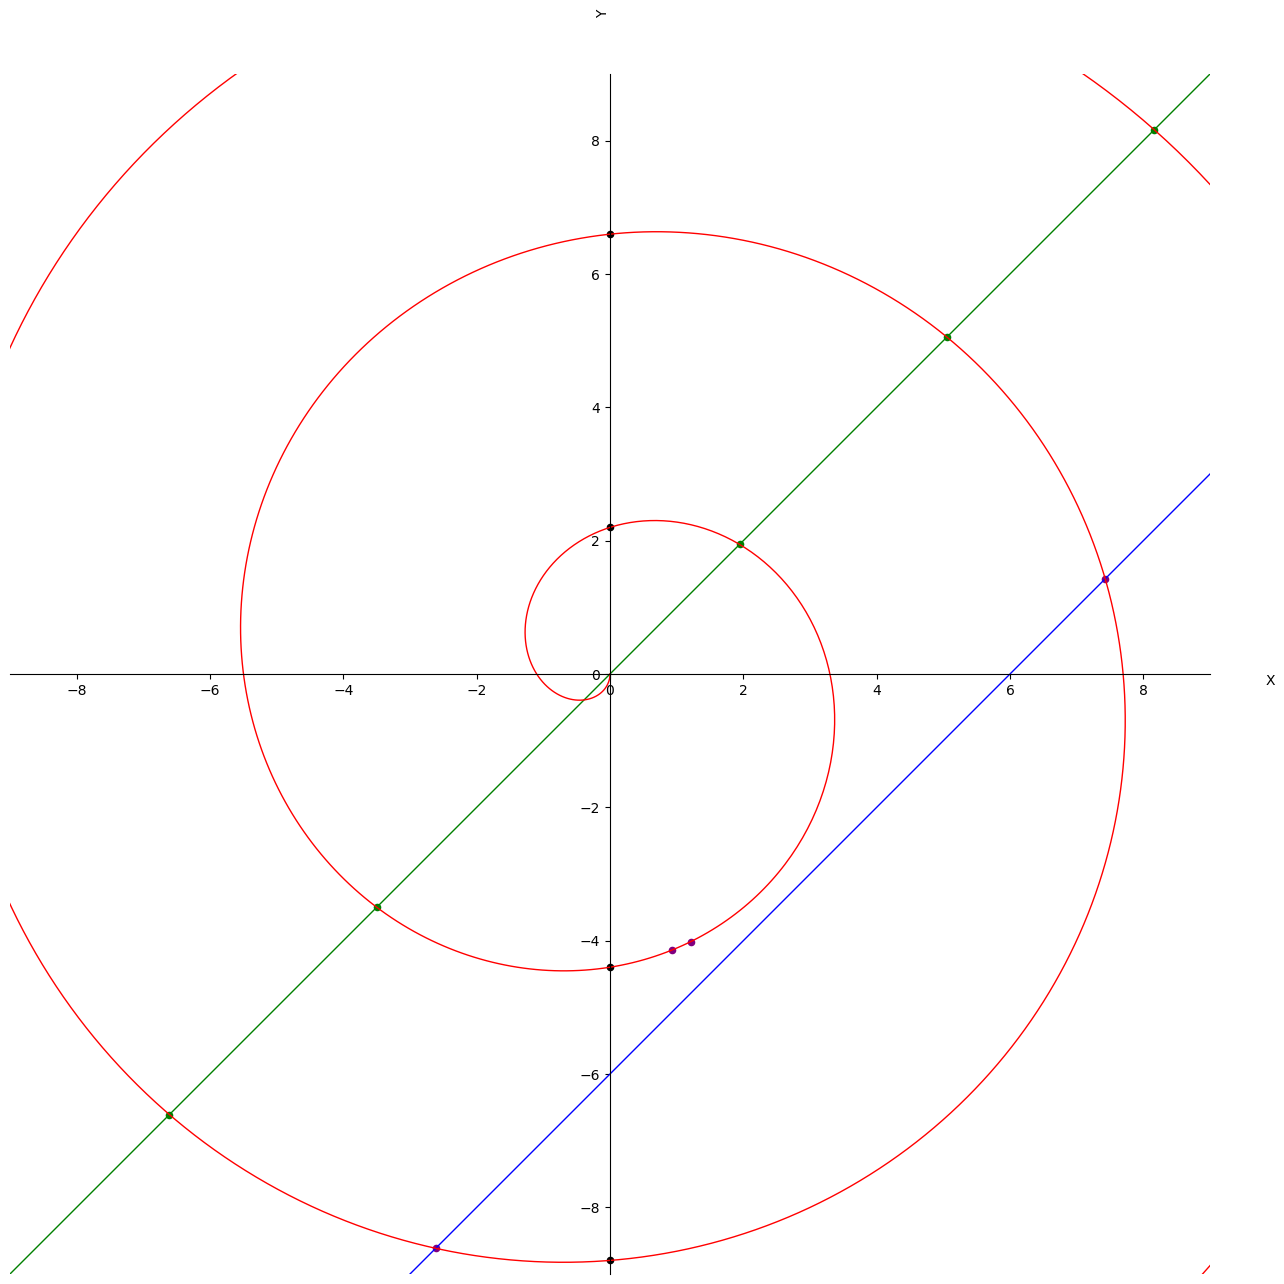

In [460]:
# Define line and spiral variables

factor = 1
a = factor *1
b = factor * -6
'factor = 4'
'a = 1'
'b = -5.64'
'13.9752109'
'-5.53005'
spiral_radius_velocity = factor *0.7
init_spiral_angle = 3*(np.pi/2)
spiral_angle_velocity = -1

c = 9
f = 20
plot_objects(a, b,spiral_radius_velocity, spiral_angle_velocity, 
             init_spiral_angle,
             figsize=(f, f),
             x_y_lim=((-c, c),(-c, c)))

In [ ]:


def take_derivative(t,init_spiral_angle, spiral_angle_velocity, spiral_radius_velocity):
    total_angle = init_spiral_angle + t* spiral_radius_velocity
    d_x = spiral_angle_velocity * np.cos(total_angle) - t * spiral_radius_velocity * spiral_angle_velocity * np.sin(total_angle)
    d_y = spiral_angle_velocity * np.cos(total_angle) - t * spiral_radius_velocity * spiral_angle_velocity * np.sin(total_angle)

88888888888888
1.9416110387254684 5.975664329483111 1.516421431727225
v/w:  0.8333333333333334
4.565071278216736
const_angle:  217.99026187437107
0.4607040277786828


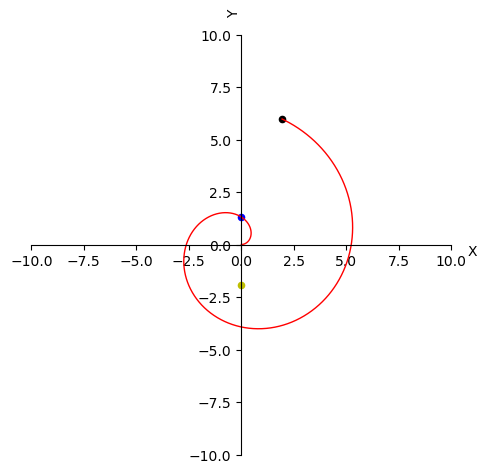

In [559]:
b = 10

create_field(x_lim=(-b,b), y_lim=(-b,b))

v = 1
w = 1.2

time = np.linspace(0, 2*np.pi, 3000)
x = time*v*np.cos(time * w)
y = time*v*np.sin(time * w)


print('88888888888888')
angles = time*w
y_angles_zip = list(zip(angles, y))
y_angles_zip = np.array([a for a in y_angles_zip if 0<=a[0]<=np.pi])
y_max = max(y_angles_zip[:,1])
# print([a for a in y_angles_zip if 0<=a[0]<=np.pi])
c = np.pi/2/w
pi_by_2_y = c*v*np.sin(c*w)


plt.plot(x, y,  color = 'red', linewidth = 1, linestyle = '-')
max_y = max(y)
max_x = x[list(y).index(max_y)]
print(max_x, max_y, y_max)
# print((1 - init_spiral_angle)/spiral_angle_velocity)
print('v/w: ',v/w)
print(max_y/pi_by_2_y)
const_angle = np.pi/2 +np.arctan(y_max/ max_x)
print('const_angle: ', const_angle*180/np.pi + 90)

plt.scatter(max_x, max_y, color= 'black', s=20)

u_t = (np.pi/2 + const_angle) / w

y_intrsct = u_t* v * np.sin(u_t*w)
x_intrsct = u_t* v * np.cos(u_t*w)

plt.scatter(0, pi_by_2_y, color='blue', s=20)
plt.scatter(0, y_intrsct, color='y',s=20)
# plt.scatter(x_intrsct, y_intrsct, color='r',s=20)

'1.1584541771785286'
'1.158460555101382'
'26.396396396396362'
print((26.396396396396362 * np.pi)/180)
plt.show()

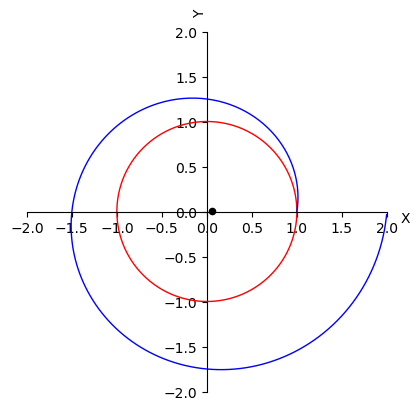

In [618]:

angle_velocity = 1/(2* np.pi)
spiral_velocity = 2 / (2*np.pi)

f = 6
l = 2
create_field(figsize=(f, f), x_lim=(-l, l), y_lim=(-l, l))
v = 1 / (2*np.pi)
w = 1/(2* np.pi)
d_angles = np.linspace(0, 2*np.pi, 360, endpoint=False)
t = d_angles / w
x_circle = np.cos(t * w)
y_circle = np.sin(t * w)

x_spiral = np.cos(d_angles)+(d_angles*w ) * np.cos(d_angles)
y_spiral = np.sin(d_angles)+(d_angles*w ) * np.sin(d_angles)

plt.plot(x_circle, y_circle,  color = 'red', linewidth = 1, linestyle = '-')
plt.plot(x_spiral, y_spiral,  color = 'blue', linewidth = 1, linestyle = '-')

const_time = (26.396396396396362 + 90) * np.pi/180 * w
x = (const_time* v) * np.cos(const_time * w)
y = ( const_time * v) * np.sin(const_time * w)

plt.scatter(x, y, color= 'black', s= 20)


plt.show()